## Importing the libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [26]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
X=df.drop(labels=['DEATH_EVENT'], axis=1)
y=df['DEATH_EVENT']

In [27]:
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Feature selection

In [29]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.03474689, 0.04160777, 0.        , 0.02394841, 0.14891456,
       0.00937963, 0.01628354, 0.04691207, 0.03442159, 0.        ,
       0.        , 0.27317871])

In [30]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

time                        0.273179
ejection_fraction           0.148915
serum_creatinine            0.046912
anaemia                     0.041608
age                         0.034747
serum_sodium                0.034422
diabetes                    0.023948
platelets                   0.016284
high_blood_pressure         0.009380
creatinine_phosphokinase    0.000000
sex                         0.000000
smoking                     0.000000
dtype: float64

<AxesSubplot:>

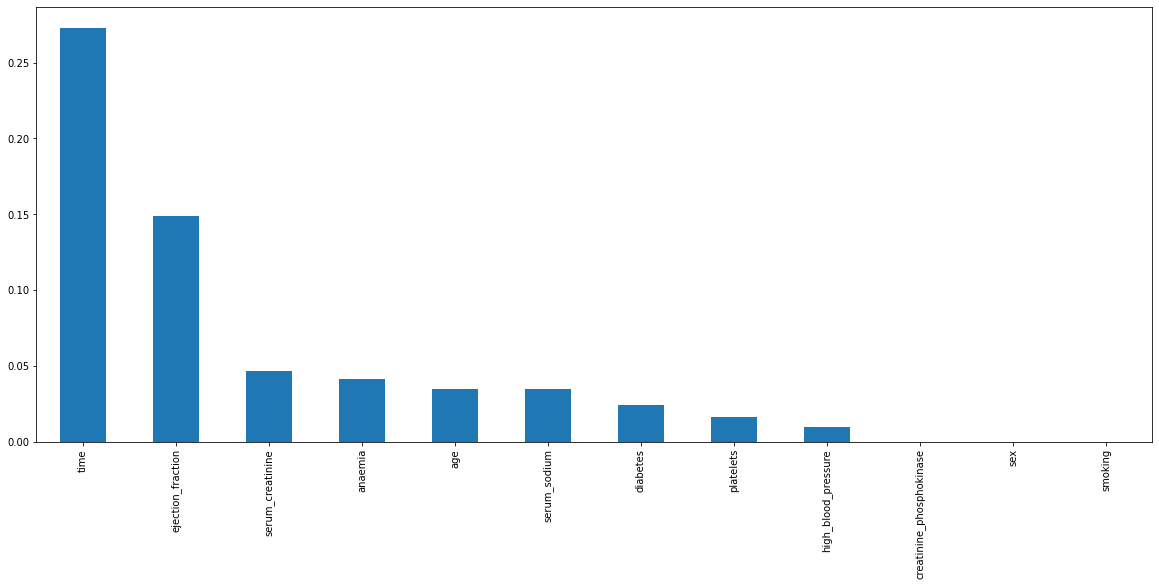

In [31]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [34]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['age', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine',
       'time'],
      dtype='object')

## Checking the existence of the NULL values present in the dataset

In [33]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Making the dataset for the machine learning model after feature selection

### after performing backward elimination we conclude that feature 1 5 and 8 are statistically significant and i am getting almost same results even after using mutual information classifier

In [35]:
dataset.drop(["creatinine_phosphokinase","diabetes","platelets","anaemia","serum_sodium","sex","smoking"],axis=1,inplace=True)

In [36]:
dataset

,age,ejection_fraction,high_blood_pressure,serum_creatinine,time,DEATH_EVENT
0,75.0,20,1,1.9,4,1
1,55.0,38,0,1.1,6,1
2,65.0,20,0,1.3,7,1
3,50.0,20,0,1.9,7,1
4,65.0,20,0,2.7,8,1
...,...,...,...,...,...,...
294,62.0,38,1,1.1,270,0
295,55.0,38,0,1.2,271,0
296,45.0,60,0,0.8,278,0
297,45.0,38,0,1.4,280,0


In [48]:
X=dataset.iloc[:,:-1].values # features
y=dataset.iloc[:,-1].values  # labels

## Splitting the dataset into training set and testing set

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

## Feature scaling

In [50]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_train[:,2:]=sc.fit_transform(X_train[:,2:])
# X_test[:,2:]=sc.transform(X_test[:,2:])

## Training the model on the training set

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)

# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train, y_train)

# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state=0)
# classifier.fit(X_train, y_train)

# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
# classifier.fit(X_train, y_train)

# from sklearn.svm import SVC
# classifier = SVC(kernel="rbf",random_state=0)
# classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the new results

In [84]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]]


## Evaluating the performance of the machine learning model

In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[44  4]
 [10 17]]


0.8133333333333334

In [86]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard deviation:{:.2f}%".format(accuracies.std()*100))

Accuracy:84.72%
Standard deviation:10.07%


In [87]:
dataset

,age,ejection_fraction,high_blood_pressure,serum_creatinine,time,DEATH_EVENT
0,75.0,20,1,1.9,4,1
1,55.0,38,0,1.1,6,1
2,65.0,20,0,1.3,7,1
3,50.0,20,0,1.9,7,1
4,65.0,20,0,2.7,8,1
...,...,...,...,...,...,...
294,62.0,38,1,1.1,270,0
295,55.0,38,0,1.2,271,0
296,45.0,60,0,0.8,278,0
297,45.0,38,0,1.4,280,0


## Predicting the new results

CHECK WHETHER THE HEART OF THE PATIENT IS GOING TO BE FAILED IF HE OR SHE HAS FOLLOWING REPORTS

In [94]:
print(classifier.predict([[35,4,0,1.8,250]]))

[0]
